# 4-1 학습목표 및 실습 결론 요약

- 학습 목표
  - 로이터 뉴스 데이터 이해
  - F1-score와 confusion matrix 출력해보기
  - 여러 머신러닝 모델에 대해서 성능 비교해보기
  - 단어 수에 따른 성능 비교해보기

- 실습 결론 요약
  - 뉴스 카테고리 분류 문제에 관해서 다양한 머신러닝 모델(로지스틱 회귀, 랜덤포레스트, 그레디언트 부스팅 트리, 보팅) 중 보팅의 성능이 가장 뛰어났음
  - vocab_size를 모든 단어, 10,000개, 5,000개, 1000개로 조정하며 실습한 결과, 모든 단어를 다 사용했을 때 (보팅) 모델의 성능이 가장 뛰어남 
  - LSTM 모델의 경우 정확도가 약 70%를 기록했으며 머신러닝 모델에 조금 못미치는 수준임

# 4-2 데이터 확인하기 - 로이터 뉴스 데이터

## 데이터 로드

In [3]:
# 1. 데이터 다운로드

from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# 2. 훈련 데이터와 테스트 데이터 로드

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)



2121728/2110848 [==============================] - 0s 0us/step


## 데이터 출력

In [5]:
# 3. 데이터 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

print(x_train[0])
print(x_test[0])

print(y_train[0])
print(y_test[0])

num_classes = max(y_train) + 1
print('클래스 개수: {}'.format(num_classes))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510,

## 데이터 분포 확인

훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


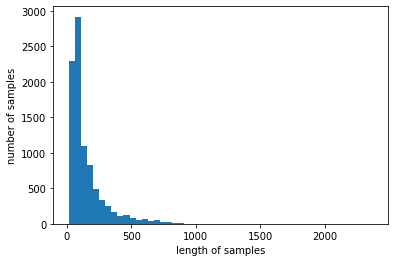

In [6]:
# 4. 데이터 길이 분포 확인

print('훈련용 뉴스의 최대 길이: {}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이: {}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

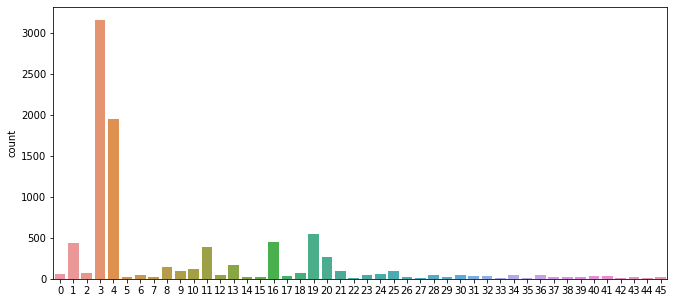

In [7]:
# 5. 클래스 분포 확인 : 클래스 별 데이터 개수 시각화

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()


In [8]:
# 6. 클래스별 빈도수 계산: np.unique()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))


각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


# 4-3 데이터 복원하기 - 로이터 뉴스 데이터2

## 원본 뉴스 데이터로 복원하기


In [78]:
# 6. dictionary 다운 - 단어:key, 고유한 정수:value

word_index = reuters.get_word_index(path="reuters_word_index.json")

  # dictionary 변경: index_to_word 구하기
    # 1. key, value 위치 바꾸기
    # 2. word_index에 있는 수에 +3 - 해당 숫자가 실제 고유한 정수값임
print(word_index['the'])
print(word_index['it'])

index_to_word = { index+3: word for word, index in word_index.items()}  # dictionary.items(): 키와 값 모두 출력

print(index_to_word[4])
print(index_to_word[16])
len(word_index)

1
13
the
it


30979

In [10]:
# 7. <pad>, <sos>, <unk> 토큰 추가

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token


In [11]:
# 8. 훈련용 뉴스 기사 텍스트로 복원

print(' '.join([index_to_word[index] for index in x_train[0]]))

print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

print(' '.join([index_to_word[index] for index in [4, 12000, 23, 133, 6, 30, 515]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
the transaction is expected to be completed
the staffing is expected to be completed


In [12]:
# 9. 훈련용 및 테스트용 뉴스데이터 텍스트 변환

  # 훈련용 데이터
decoded_train = []
for i in range(len(x_train)):
    t = ' '.join(index_to_word[index] for index in x_train[i])
    decoded_train.append(t)

x_train = decoded_train

print(len(x_train))

print(x_train[0])



  # 테스트용 데이터
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join(index_to_word[index] for index in x_test[i])
    decoded_test.append(t)

x_test = decoded_test

print(len(x_test))

print(x_test[0])


8982
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
2246
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital

# 4-4 벡터화 하기
- 인공 신경망을 이용한 벡터화가 아닌 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬 이용
- DTM
  - 단점
    - 문서를 분류할 때, 같은 단어가 많이 등장하는 문서일 수록 유사도가 높다고 판단하지만,
    - 해당 단어가 중요하지 않은 의미를 가지는 단어일 경우 모델 성능이 저하될 수 있음

- TF-IDF
  - 특징: 모든 문서에 걸쳐서 중요하다고 판단되는 빈출 단어에 가중치를 주는 효과를 가짐


In [13]:
# 10. 모듈 임포트

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
# 11. DTM 생성 및 크기 확인: (훈련 데이터 개수 8982개, 단어 사전 10,000개 - @)

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [15]:
# 12. TF-IDF 생성

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


# 4-5 나이브 베이즈 분류기

# 머신러닝 라이브러리 불러오기

In [16]:
# 13. 라이브러리 임포트

from sklearn.naive_bayes import MultinomialNB   # 다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score    # 정확도 계산


## 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)


In [17]:
# 13. 나이브 베이즈 분류기로 모델 훈련

model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [18]:
# 14. 테스트 데이터 전처리 및 정확도 측정

  # test 데이터를 DTM으로 변환
x_test_dtm = dtmvector.transform(x_test)

  # DTM을 IF-IDF 행렬로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

  # 테스트 데이터에 대한 예측
predicted = model.predict(tfidfv_test)

  # 정확도 출력: 예측값-실제값 비교
print('정확도:', accuracy_score(y_test, predicted))

정확도: 0.6567230632235085


<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
4


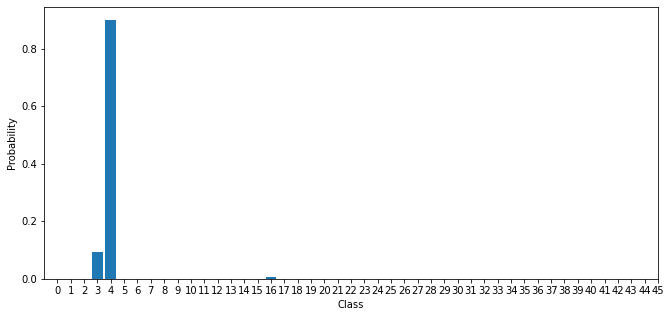

In [19]:
# 15. 모델 성능 파악 - 시각화

  # 테스트 데이터셋 4번 째 샘플의 input 및 target 데이터 확인
print(x_test[3])
print(y_test[3])

  # 확률 시각화
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()

In [20]:
# 16. 모델 예측

model.predict(tfidfv_test[3])

array([4])

# 4-6 F1-socre, Confusion Matrix
  - accuracy(정확도)
  - precision(정밀도): True로 예측한 값 중 실제 True 인 것
  - recall(재현율): 실제  True중 True로 예측한 값
  - F1 score: precision과 recall의 조화 평균
    - 2 x precision x recall / precision + recall

In [21]:
# 17. precision, Recall & F1 Score 구하기

  # 라이브러리 임포트
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

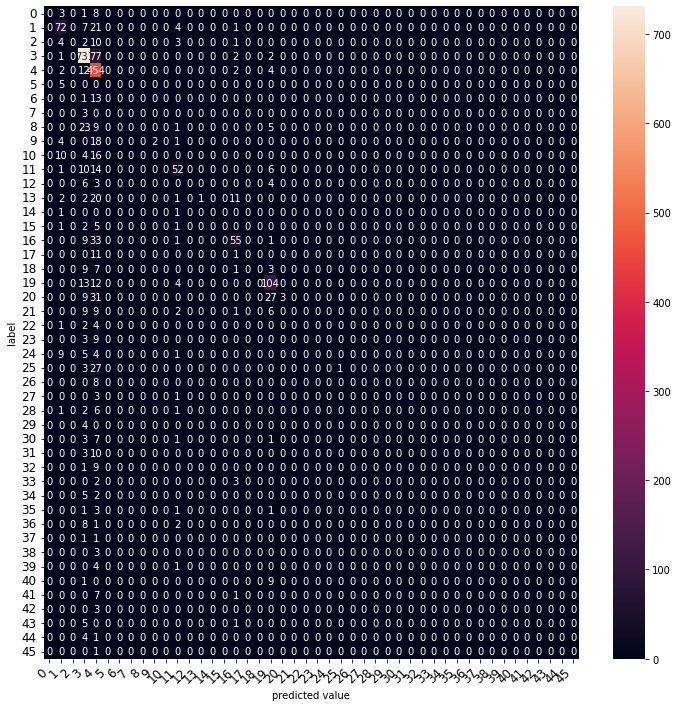

In [29]:
# 18. 혼동 행렬(confusion matrix) 시각화

def graph_confusion_matrix(model, x_test, y_test):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')


graph_confusion_matrix(model, tfidfv_test, y_test)

# 4-7 다양한 머신러닝 모델 사용하기

## complement Naive Bayers Classifier(CNB)
  - 데이터의 불균형을 고려하여 가중치를 부여하는 특징
  - 일반적으로 나이브 베이즈 분류기보다 성능이 좋음

In [35]:
# 모델 훈련 및 정확도 확인

cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7707034728406055


## 로지스틱 회귀 

In [36]:
# 모델 훈련 및 정확도 확인
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
print("정확도", accuracy_score(y_test, predicted))

정확도 0.8076580587711487


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 선형 선포트 벡터 머신(Linear Support Vector Machine)

In [38]:
# 모델 훈련 및 정확도 확인

lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.7680320569902048


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# 4-8 다양한 머신러닝 모델 사용

## 결정 트리(Decision Tree)

In [45]:
# 모델 훈련 및 정확도 평가

tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print('정확도:', accuracy_score(y_test, predicted))


정확도: 0.6202137132680321


## 랜덤 포레스트(Random Forest)

In [49]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print('accuracy:', accuracy_score(y_test, predicted))

accuracy: 0.674087266251113


## 그래디언트 부스팅 트리(GradientBoostingClassifier)



In [95]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

NameError: ignored

## 보팅(Voting)

In [54]:
# 보팅 및 정확도 확인

voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

accuracy:  0.8116651825467498


# 실습: 단어 사용 개수를 조정하여 성능 비교

## case1. 모든 단어 사용

In [84]:
# 1. 데이터 로드

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print(len(x_train))
print(len(x_test))
                                                         

8982
2246


In [85]:
# 2. 데이터 전처리

  # word_to_index 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3: word for word, index in word_index.items()}  # dictionary.items(): 키와 값 모두 출력

  # <pad>, <sos>, <unk> 토큰 추가
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

  # 훈련용 및 테스트용 데이터 생성
decoded_train = []
for i in range(len(x_train)):
    t = ' '.join(index_to_word[index] for index in x_train[i])
    decoded_train.append(t)
x_train = decoded_train

decoded_test = []
for i in range(len(x_test)):
    t = ' '.join(index_to_word[index] for index in x_test[i])
    decoded_test.append(t)
x_test = decoded_test

len(word_index)

30979

In [86]:
# 3. 벡터화: DTM 및 TF-IDF 생성
  # 인풋데이터 벡터화
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

  # 타겟 데이터 벡터화
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)





In [87]:
# 4. 모델 훈련 - 로지스틱 회귀

lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
accuracy_score(y_test, predicted)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.813446126447017

In [88]:
# 5. 모델 훈련 - 랜덤 포레스트

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
accuracy_score(y_test, predicted)

0.6544968833481746

In [97]:
# 6. 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

accuracy:  0.7702582368655387


In [100]:
# 6. 모델 훈련 - 보팅
voting_classifier = VotingClassifier(estimators=[
                    ('lr', LogisticRegression(C=10000, penalty='l2')),
                    ('forest', RandomForestClassifier(n_estimators=5, random_state=0)),
                    ('grbt', GradientBoostingClassifier(random_state=0))

], voting='soft', n_jobs=-1)    
voting_classifier.fit(tfidfv, y_train)
predicted = voting_classifier.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

accuracy:  0.8178984861976848


## Case2. 5000단어 사용

In [101]:
# 1. 데이터 로드

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

print(len(x_train))
print(len(x_test))
                                                         

8982
2246


In [102]:
# 2. 데이터 전처리

  # word_to_index 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3: word for word, index in word_index.items()}  # dictionary.items(): 키와 값 모두 출력

  # <pad>, <sos>, <unk> 토큰 추가
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

  # 훈련용 및 테스트용 데이터 생성
decoded_train = []
for i in range(len(x_train)):
    t = ' '.join(index_to_word[index] for index in x_train[i])
    decoded_train.append(t)
x_train = decoded_train

decoded_test = []
for i in range(len(x_test)):
    t = ' '.join(index_to_word[index] for index in x_test[i])
    decoded_test.append(t)
x_test = decoded_test

len(word_index)

30979

In [103]:
# 3. 벡터화: DTM 및 TF-IDF 생성
  # 인풋데이터 벡터화
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

  # 타겟 데이터 벡터화
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)





In [104]:
# 4. 모델 훈련 - 로지스틱 회귀

lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
accuracy_score(y_test, predicted)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8058771148708815

In [105]:
# 5. 모델 훈련 - 랜덤 포레스트

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
accuracy_score(y_test, predicted)

0.701246660730187

In [106]:
# 6. 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

accuracy:  0.767586821015138


In [108]:
# 6. 모델 훈련 - 보팅
voting_classifier = VotingClassifier(estimators=[
                    ('lr', LogisticRegression(C=10000, penalty='l2')),
                    ('forest', RandomForestClassifier(n_estimators=5, random_state=0)),
                    ('grbt', GradientBoostingClassifier(random_state=0))

], voting='soft', n_jobs=-1)    
voting_classifier.fit(tfidfv, y_train)
predicted = voting_classifier.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

accuracy:  0.8125556544968834


## case3. 1,000단어 사용

In [109]:
# 1. 데이터 로드

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

print(len(x_train))
print(len(x_test))
                                                         

8982
2246


In [110]:
# 2. 데이터 전처리

  # word_to_index 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3: word for word, index in word_index.items()}  # dictionary.items(): 키와 값 모두 출력

  # <pad>, <sos>, <unk> 토큰 추가
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

  # 훈련용 및 테스트용 데이터 생성
decoded_train = []
for i in range(len(x_train)):
    t = ' '.join(index_to_word[index] for index in x_train[i])
    decoded_train.append(t)
x_train = decoded_train

decoded_test = []
for i in range(len(x_test)):
    t = ' '.join(index_to_word[index] for index in x_test[i])
    decoded_test.append(t)
x_test = decoded_test

len(word_index)

30979

In [111]:
# 3. 벡터화: DTM 및 TF-IDF 생성
  # 인풋데이터 벡터화
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

  # 타겟 데이터 벡터화
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)





In [112]:
# 4. 모델 훈련 - 로지스틱 회귀

lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
accuracy_score(y_test, predicted)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.780053428317008

In [113]:
# 5. 모델 훈련 - 랜덤 포레스트

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
accuracy_score(y_test, predicted)

0.707479964381122

In [114]:
# 6. 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

accuracy:  0.7457702582368655


In [115]:
# 6. 모델 훈련 - 보팅
voting_classifier = VotingClassifier(estimators=[
                    ('lr', LogisticRegression(C=10000, penalty='l2')),
                    ('forest', RandomForestClassifier(n_estimators=5, random_state=0)),
                    ('grbt', GradientBoostingClassifier(random_state=0))

], voting='soft', n_jobs=-1)    
voting_classifier.fit(tfidfv, y_train)
predicted = voting_classifier.predict(tfidfv_test)
print('accuracy: ', accuracy_score(y_test, predicted))

accuracy:  0.8000890471950134


## Case4. LSTM모델과 비교

In [ ]:
# 1. 데이터 로드
from tensorflow.keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

print(len(x_train))
print(len(x_test))
                                                         

8982
2246


In [ ]:
# 2. 데이터 전처리

  # word_to_index 생성
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3: word for word, index in word_index.items()}  # dictionary.items(): 키와 값 모두 출력

  # <pad>, <sos>, <unk> 토큰 추가
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

  # 훈련용 및 테스트용 데이터 생성
decoded_train = []
for i in range(len(x_train)):
    t = ' '.join(index_to_word[index] for index in x_train[i])
    decoded_train.append(t)

decoded_test = []
for i in range(len(x_test)):
    t = ' '.join(index_to_word[index] for index in x_test[i])
    decoded_test.append(t)

word_to_index = {word: index for index, word in index_to_word.items()}

In [ ]:
len(word_to_index)

30982

In [ ]:
# 3. 벡터화

import tensorflow as tf
from keras.utils import np_utils

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<pad>"],                                                                                                           
                                                        padding='post',
                                                        maxlen=100)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<pad>"], 
                                                       padding='post',
                                                       maxlen=100)


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(x_train.shape)

(8982, 100)


In [ ]:
# LSTM 모델 생성

vocab_size = 1000
word_vector_dim = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(100, activation='tanh'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 100)         100000    
                                                                 
 lstm_19 (LSTM)              (None, 100)               80400     
                                                                 
 dense_34 (Dense)            (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=100, 
          verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 18s 178ms/step - loss: 1.4666 - accuracy: 0.6266 - val_loss: 1.5647 - val_accuracy: 0.6060
Epoch 2/20
90/90 [==============================] - 16s 175ms/step - loss: 1.4105 - accuracy: 0.6444 - val_loss: 1.5540 - val_accuracy: 0.6207
Epoch 3/20
90/90 [==============================] - 15s 171ms/step - loss: 1.3368 - accuracy: 0.6664 - val_loss: 1.4610 - val_accuracy: 0.6345
Epoch 4/20
90/90 [==============================] - 15s 171ms/step - loss: 1.2581 - accuracy: 0.6869 - val_loss: 1.4142 - val_accuracy: 0.6402
Epoch 5/20
90/90 [==============================] - 15s 169ms/step - loss: 1.2043 - accuracy: 0.6958 - val_loss: 1.3560 - val_accuracy: 0.6563
Epoch 6/20
90/90 [==============================] - 15s 171ms/step - loss: 1.1470 - accuracy: 0.7092 - val_loss: 1.3007 - val_accuracy: 0.6674
Epoch 7/20
90/90 [==============================] - 15s 168ms/step - loss: 1.0896 - accuracy: 0.7227 - val_loss: 1.2970 - val_accuracy: 0.6701

In [ ]:
# 테스트 정확도 출력
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 18ms/step - loss: 1.3041 - accuracy: 0.6981


[1.3041306734085083, 0.6981300115585327]